In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import cv2 
import torch
import os,glob
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import Dataset
from tqdm.auto import tqdm
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from sklearn.model_selection import train_test_split
from torch.utils.data import random_split
import torchvision.models as models

In [2]:
class UTKCustom(Dataset):
    def __init__(self,root):
        self.path=root
        file_list=glob.glob(self.path+"/*.jpg")
        self.data=[]
        for f in file_list:
            try:
                class_name=f.split('_')[0]
                class_name=class_name.split('/')[-1]
                self.data.append([f,class_name])
            except:
                pass
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,id):
        img_path,class_name=self.data[id]
        img=cv2.imread(img_path)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img=torch.from_numpy(img).permute(2,0,1).to(torch.float32)/255
        class_name=torch.tensor(float(class_name),dtype=torch.float32)
        
        return img,class_name

In [3]:
ds=UTKCustom('/kaggle/input/utkface-new/UTKFace')
len(ds)

23708

In [4]:
train_ds,valid_ds,test_ds=random_split(ds,[18966,2371,2371],torch.Generator().manual_seed(42))

In [5]:
train_ds[0]

(tensor([[[0.1255, 0.1294, 0.1333,  ..., 0.1255, 0.1255, 0.1255],
          [0.1255, 0.1294, 0.1294,  ..., 0.1216, 0.1255, 0.1255],
          [0.1255, 0.1294, 0.1294,  ..., 0.1216, 0.1216, 0.1216],
          ...,
          [0.1098, 0.1216, 0.1373,  ..., 0.0863, 0.0941, 0.0980],
          [0.1059, 0.1176, 0.1333,  ..., 0.0824, 0.0902, 0.0980],
          [0.1059, 0.1176, 0.1333,  ..., 0.0824, 0.0902, 0.0941]],
 
         [[0.0824, 0.0863, 0.0941,  ..., 0.0902, 0.0863, 0.0863],
          [0.0824, 0.0863, 0.0902,  ..., 0.0863, 0.0863, 0.0863],
          [0.0824, 0.0863, 0.0902,  ..., 0.0863, 0.0863, 0.0863],
          ...,
          [0.0863, 0.0980, 0.1137,  ..., 0.0627, 0.0706, 0.0745],
          [0.0824, 0.0941, 0.1098,  ..., 0.0588, 0.0667, 0.0745],
          [0.0824, 0.0941, 0.1098,  ..., 0.0588, 0.0667, 0.0706]],
 
         [[0.0745, 0.0784, 0.0902,  ..., 0.0941, 0.0902, 0.0902],
          [0.0745, 0.0784, 0.0863,  ..., 0.0902, 0.0902, 0.0902],
          [0.0667, 0.0706, 0.0824,  ...,

In [6]:
train_ds[0][0],train_ds[0][0].shape

(tensor([[[0.1255, 0.1294, 0.1333,  ..., 0.1255, 0.1255, 0.1255],
          [0.1255, 0.1294, 0.1294,  ..., 0.1216, 0.1255, 0.1255],
          [0.1255, 0.1294, 0.1294,  ..., 0.1216, 0.1216, 0.1216],
          ...,
          [0.1098, 0.1216, 0.1373,  ..., 0.0863, 0.0941, 0.0980],
          [0.1059, 0.1176, 0.1333,  ..., 0.0824, 0.0902, 0.0980],
          [0.1059, 0.1176, 0.1333,  ..., 0.0824, 0.0902, 0.0941]],
 
         [[0.0824, 0.0863, 0.0941,  ..., 0.0902, 0.0863, 0.0863],
          [0.0824, 0.0863, 0.0902,  ..., 0.0863, 0.0863, 0.0863],
          [0.0824, 0.0863, 0.0902,  ..., 0.0863, 0.0863, 0.0863],
          ...,
          [0.0863, 0.0980, 0.1137,  ..., 0.0627, 0.0706, 0.0745],
          [0.0824, 0.0941, 0.1098,  ..., 0.0588, 0.0667, 0.0745],
          [0.0824, 0.0941, 0.1098,  ..., 0.0588, 0.0667, 0.0706]],
 
         [[0.0745, 0.0784, 0.0902,  ..., 0.0941, 0.0902, 0.0902],
          [0.0745, 0.0784, 0.0863,  ..., 0.0902, 0.0902, 0.0902],
          [0.0667, 0.0706, 0.0824,  ...,

In [7]:
train_ds[0][1]

tensor(32.)

(-0.5, 199.5, 199.5, -0.5)

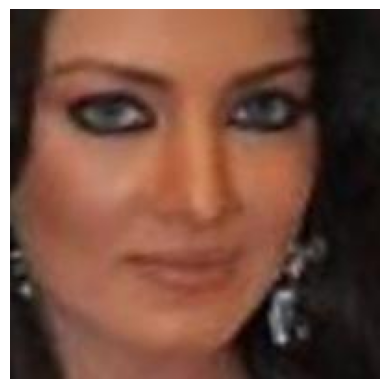

In [8]:
plt.imshow((train_ds[0][0]).permute(1,2,0).to(torch.float32))
plt.axis('off')

(array([2710., 2108., 7267., 2527., 2128., 1132.,  685.,  355.,   39.,
          15.]),
 array([  1. ,  12.5,  24. ,  35.5,  47. ,  58.5,  70. ,  81.5,  93. ,
        104.5, 116. ]),
 <BarContainer object of 10 artists>)

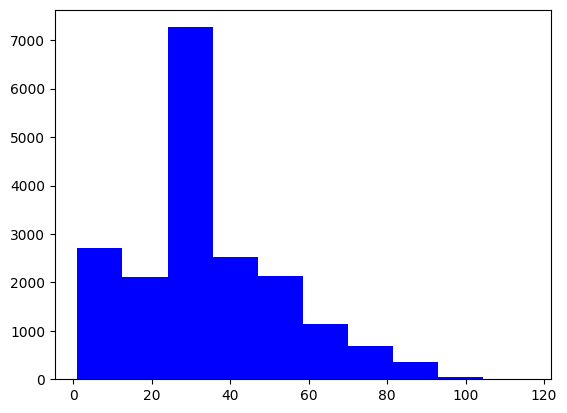

In [9]:
plt.hist([train_ds[i][1] for i in range(len(train_ds))],bins=10,color="blue")

In [10]:
BATCH=16

train_dataloader=DataLoader(dataset=test_ds,batch_size=BATCH,shuffle=True,num_workers=os.cpu_count())
test_dataloader=DataLoader(dataset=test_ds,batch_size=BATCH)
valid_dataloader=DataLoader(dataset=test_ds,batch_size=BATCH)

train_dataloader,valid_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79173d18ad40>,
 <torch.utils.data.dataloader.DataLoader at 0x79173d21fa30>)

In [11]:
for X,y in test_dataloader:
    print(y.shape)
    break

torch.Size([16])


In [12]:
class ResNetModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.resnet1 = models.resnet34(pretrained=True)
        self.resnet1.fc=nn.Sequential(
            nn.Linear(in_features=self.resnet1.fc.in_features,out_features=256),
            nn.ReLU(),
            nn.Linear(in_features=256,out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64,out_features=1)
        )
        
        for params in self.resnet1.parameters():
            params.requires_grad=False
            
        for params in self.resnet1.fc.parameters():
            params.requires_grad=True
        
    def forward(self,x):
        return self.resnet1(x)

model0=ResNetModel()
model0

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 158MB/s]


ResNetModel(
  (resnet1): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [13]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [14]:
dummy_x=torch.randn(size=[20,3,200,200],dtype=torch.float32,device="cpu")
dummy_x.shape

torch.Size([20, 3, 200, 200])

In [15]:
#model0.to(device)
model0(dummy_x)

tensor([[0.1865],
        [0.1667],
        [0.2005],
        [0.1585],
        [0.1221],
        [0.1156],
        [0.0960],
        [0.1430],
        [0.0591],
        [0.1323],
        [0.1480],
        [0.0778],
        [0.1573],
        [0.1203],
        [0.1333],
        [0.1854],
        [0.0874],
        [0.0958],
        [0.1397],
        [0.1249]], grad_fn=<AddmmBackward0>)

In [16]:
def training(model,dataLoader,lossFn,optimizer,accuracyFn=None,printEvery=8,conversionFn=None):
    #Training mode

    model.train()
    tloss,acc=0,0
    #losses=[]
    for batch,(X,y) in enumerate(dataLoader):
        X=X.to(device=device)
        y=y.to(device=device)
        #Predictions
        y_pred=model(X)
        """print(y_pred)
        break"""
        #print(y_pred)
        loss=0
        #Batch wise loss and accuracy addition, Might need some conversion function like Logits to sigmoid like for BCELoss
        if conversionFn is None:
            loss=lossFn(y_pred,y)
            tloss+=loss
            #losses.append(loss)
            #acc+=accuracyFn(torch.softmax(y_pred,dim=1).argmax(dim=1),y)
        else:
            loss=lossFn(conversionFn(y_pred,dim=1).argmax(dim=1),y)
            tloss+=loss
            #losses.append(loss)
            #acc+=accuracyFn(conversionFn(y_pred,dim=1).argmax(dim=1),y)
        
        
        #Zero the optimizer
        optimizer.zero_grad()
        
        #back propagation
        loss.backward()

        #descent of the gradient
        optimizer.step()

      #  if batch%printEvery==0:
            #print(f"Looked at sample {len(X)*batch}/{len(dataLoader.dataset)}")

    tloss/=len(dataLoader)
    #acc/=len(dataLoader)

    return tloss# ,losses

In [17]:
def testing(model,dataLoader,lossFn,accuracyFn=None,conversionFn=None):
    #Evaluation Mode
    
    model.eval()

    loss,acc = 0,0
    #epoch,losses=[],[]
    #Switch on inference mode
    with torch.inference_mode():
        #Batch wise testing
        for X,y in dataLoader:
            #Predictions
            
            X=X.to(device=device)
            y=y.to(device=device)
            y_pred=model(X)
            
            #print("y_pred:",y_pred)
            #accumulate loss and accuracy per batch
            if conversionFn is None:
                loss+=lossFn(y_pred,y)
             #   print(loss)
            #    print("loss:",loss)
                #losses.append(loss)
                #acc+=accuracyFn(torch.softmax(y_pred,dim=1).argmax(dim=1),y)
            else:
                loss+=lossFn(conversionFn(y_pred,dim=1),y)
                #acc+=accuracyFn(conversionFn(y_pred,dim=1).argmax(dim=1),y)

        loss=loss/len(dataLoader)
        #acc=acc/len(dataLoader)
    return loss#,losses

In [18]:
from tqdm.auto import tqdm
def FullTraining(epochs,model,train,test,
             lossFn,
             optimizer,training,testing,accuracyFn=None,printEvery=50,
             conversionFn=None):
    model.to(device)
    train_losses=[]
    test_losses=[]
    for epoch in tqdm(range(epochs)):
        train_loss=training(model=model,dataLoader=train,lossFn=lossFn,
                                    optimizer=optimizer,accuracyFn=None,printEvery=8,conversionFn=None)
    
        if epoch%10==0:
            test_loss=testing(model=model,dataLoader=test,lossFn=lossFn)
            
            train_losses.append(train_loss)
            test_losses.append(test_loss)
            print(f"epoch:{epoch}")
            print(f"train_loss:{train_loss}")
            #print(f"train_acc:{train_acc}")
            print(f"test_loss:{test_loss}")
            #print(f"test_acc:{test_acc}")
            print("=====================================")  
            
    return train_losses,test_losses

In [19]:
lossFn=nn.MSELoss()

optimizer=torch.optim.SGD(params=model0.parameters(),lr=0.001)

In [20]:
epochs=101

train_loss,valid_loss=FullTraining(epochs=epochs,model=model0,train=train_dataloader,
             test=valid_dataloader,lossFn=lossFn,optimizer=optimizer,
             training=training,testing=testing)

  0%|          | 0/101 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([3])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:0
train_loss:1199.62646484375
test_loss:1037.191650390625
epoch:10
train_loss:392.4878845214844
test_loss:393.0989074707031
epoch:20
train_loss:391.1295166015625
test_loss:391.2521667480469
epoch:30
train_loss:392.79791259765625
test_loss:391.23638916015625
epoch:40
train_loss:389.9769592285156
test_loss:391.2312927246094
epoch:50
train_loss:390.6373291015625
test_loss:391.2341003417969
epoch:60
train_loss:390.62548828125
test_loss:391.2314147949219
epoch:70
train_loss:390.0756530761719
test_loss:391.23419189453125
epoch:80
train_loss:390.47283935546875
test_loss:391.2305603027344
epoch:90
train_loss:392.84661865234375
test_loss:391.2343444824219
epoch:100
train_loss:391.1408996582031
test_loss:391.2344665527344


In [21]:
train_loss,valid_loss

([tensor(1199.6265, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(392.4879, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(391.1295, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(392.7979, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(389.9770, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(390.6373, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(390.6255, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(390.0757, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(390.4728, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(392.8466, device='cuda:0', grad_fn=<DivBackward0>),
  tensor(391.1409, device='cuda:0', grad_fn=<DivBackward0>)],
 [tensor(1037.1917, device='cuda:0'),
  tensor(393.0989, device='cuda:0'),
  tensor(391.2522, device='cuda:0'),
  tensor(391.2364, device='cuda:0'),
  tensor(391.2313, device='cuda:0'),
  tensor(391.2341, device='cuda:0'),
  tensor(391.2314, device='cuda:0'),
  tensor(391.2342, device='cuda:0'),
  tensor(391.2306, device='cud

In [22]:
test_loss=testing(model=model0,dataLoader=test_dataloader,lossFn=lossFn)
test_loss

tensor(391.2345, device='cuda:0')

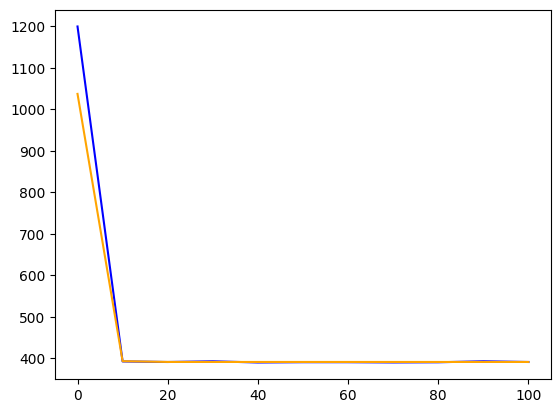

In [23]:
with torch.inference_mode():
    plt.plot([i for i in range(0,110,10)],[i.cpu().numpy() for i in train_loss],color="blue")
    plt.plot([i for i in range(0,110,10)],[i.cpu().numpy() for i in valid_loss],color="orange")

**Reduced immediately and stayed the same, maybe underfitting still**
* increase size of neural network-Doubled the size
* increase data i guess - :(
* Try cahnging hyperparameters - Tried but didn't help much

wcyd

(-0.5, 199.5, 199.5, -0.5)

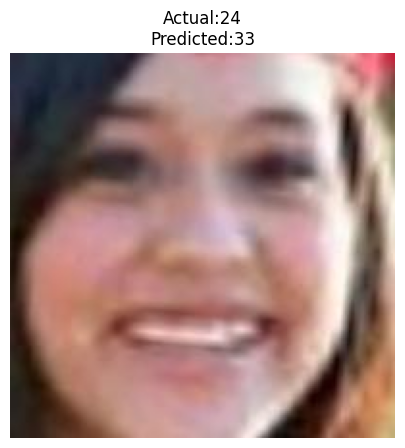

In [24]:
fig=plt.figure(figsize=(8,5))


random_idx = torch.randint(0,len(train_ds),size=[1]).item()
img,label=train_ds[random_idx]
img=img.to(device)
img=img.unsqueeze(dim=0)
pred_label=(model0(img)*100).round()
img=img.to("cpu")
plt.imshow(img.squeeze().permute(1,2,0))
plt.title(f"Actual:{round(label.item())}\nPredicted:{round(pred_label.item()/100)}")
plt.axis(False)
